In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [24]:
# Load the Iris dataset
iris = load_iris()
data = iris.data

In [25]:
# Function to initialize centroids randomly
def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

# Function to assign each data point to the nearest centroid
def assign_to_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids based on the mean of data points in each cluster
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

# Function to check convergence
def has_converged(prev_centroids, centroids, tol=1e-4):
    return np.all(np.abs(centroids - prev_centroids) < tol)

# K-Means algorithm
def k_means(data, k, max_iterations=100):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    for iteration in range(max_iterations):
        # Assign data points to clusters
        clusters = assign_to_clusters(data, centroids)
        
        # Update centroids
        prev_centroids = centroids
        centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if has_converged(prev_centroids, centroids):
            break
    
    return clusters, centroids

In [26]:
# Visualize the results
def plot_clusters(data, clusters, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend()
    plt.show()

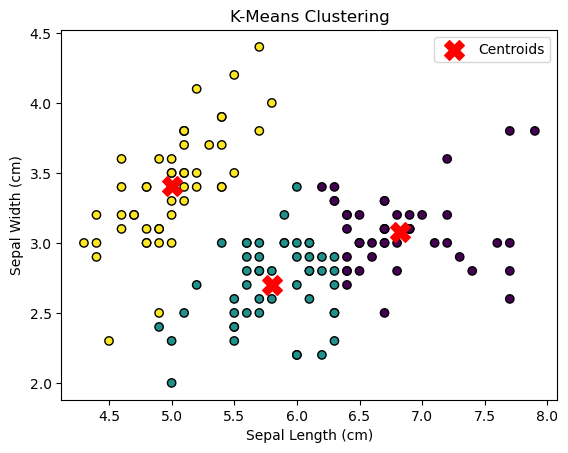

In [27]:
# Set the number of clusters (K)
k = 3

# Run K-Means algorithm
clusters, final_centroids = k_means(data[:, :2], k)

# Visualize the results
plot_clusters(data[:, :2], clusters, final_centroids)